In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
# Install openpyxl package
%pip install openpyxl

# Read Excel file with specified encoding
data = pd.read_excel('/Users/farazmustafa/Downloads/Data_for_analysis.xlsx')

Note: you may need to restart the kernel to use updated packages.


In [18]:
# Frequency distribution for categorical columns (Online/At the truck and Dietary Preferences)
categorical_freq = data[['Online or At the truck?', 
                          'Diet_Dairy-free', 
                          'Diet_Gluten-free', 
                          'Diet_Halal', 
                          'Diet_Lactose-free', 
                          'Diet_Multiple Dietary Restrictions', 
                          'Diet_No', 
                          'Diet_Vegetarian / Vegan']].apply(pd.Series.value_counts)

# Correlation analysis between numerical columns
correlation_matrix = data.corr()

# Display the results
numerical_desc, categorical_freq, correlation_matrix

(       Online or At the truck?  Spending Category  Diet_Dairy-free  \
 count               362.000000         360.000000       360.000000   
 mean                  0.497238           0.491667         0.002778   
 std                   0.500684           0.568375         0.052705   
 min                   0.000000           0.000000         0.000000   
 25%                   0.000000           0.000000         0.000000   
 50%                   0.000000           0.000000         0.000000   
 75%                   1.000000           1.000000         0.000000   
 max                   1.000000           2.000000         1.000000   
 
        Diet_Gluten-free  Diet_Halal  Diet_Lactose-free  \
 count        360.000000  360.000000         360.000000   
 mean           0.027778    0.138889           0.063889   
 std            0.164564    0.346312           0.244895   
 min            0.000000    0.000000           0.000000   
 25%            0.000000    0.000000           0.000000   
 50% 

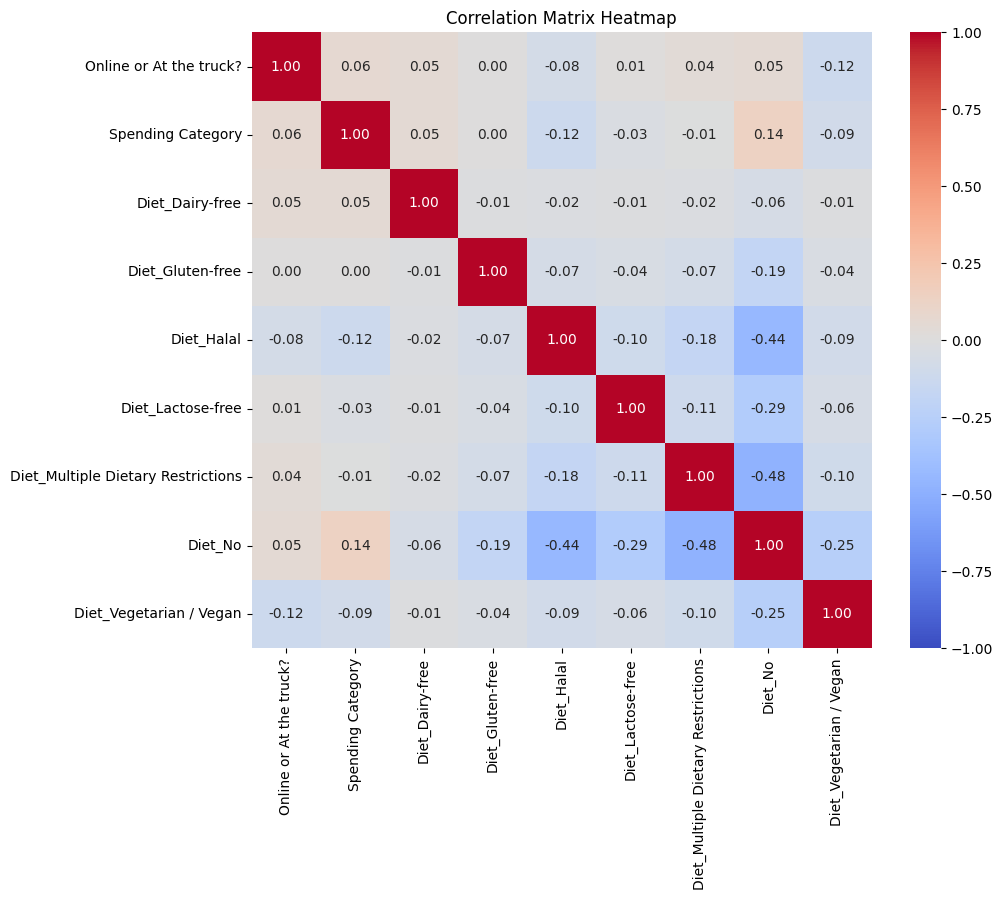

In [19]:
import seaborn as sns

# Generate the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1, cbar=True)

# Display the plot
plt.title('Correlation Matrix Heatmap')
plt.show()


In [20]:
contingency_table = pd.crosstab(data['Online or At the truck?'], data['Diet_Vegetarian / Vegan'])  # Example for vegetarian preference

In [23]:
# Install scipy package
%pip install scipy

from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f'Chi-square value: {chi2}, p-value: {p}')


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.1/23.1 MB 10.6 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.
Chi-square value: 4.529214132998877, p-value: 0.033320915814569994


In [24]:
contingency_table = pd.crosstab(data['Spending Category'], data['Diet_Dairy-free'])  # Example for one dietary restriction

In [25]:
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f'Chi-square value: {chi2}, p-value: {p}')

Chi-square value: 1.3879614086221843, p-value: 0.49958341176663923


/var/folders/_5/m_34c02s1l37sw92qsz9t6t00000gn/T/ipykernel_69685/3835524062.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='Set1')
/var/folders/_5/m_34c02s1l37sw92qsz9t6t00000gn/T/ipykernel_69685/3835524062.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='Set1')
/var/folders/_5/m_34c02s1l37sw92qsz9t6t00000gn/T/ipykernel_69685/3835524062.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='Set1')
/var/folders/_5/m_34c02s1l37sw92qsz9t6t00000gn/T/ipyker

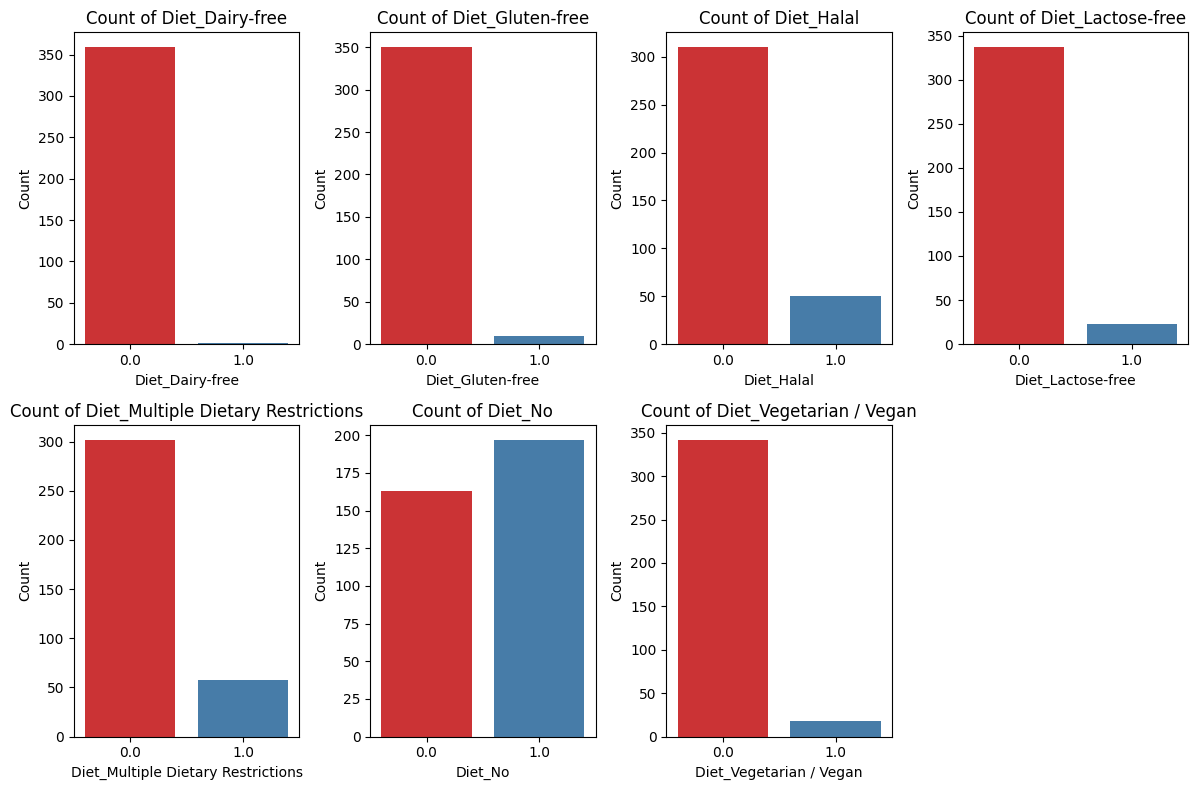

In [27]:
plt.figure(figsize=(12, 8))
dietary_columns = ['Diet_Dairy-free', 'Diet_Gluten-free', 'Diet_Halal', 'Diet_Lactose-free', 
                   'Diet_Multiple Dietary Restrictions', 'Diet_No', 'Diet_Vegetarian / Vegan']
for i, col in enumerate(dietary_columns, 1):
    plt.subplot(2, 4, i)
    sns.countplot(x=col, data=data, palette='Set1')
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [28]:
# Create a contingency table (assuming 'Spending Category' and dietary preferences like 'Diet_No', 'Diet_Vegetarian / Vegan' are the columns)
# Replace 'Diet_Vegetarian / Vegan' with your actual dietary preference column name, and 'Spending Category' with the spending variable
contingency_table = pd.crosstab(data['Diet_Vegetarian / Vegan'], data['Spending Category'])

# Display the contingency table
print("Contingency Table:")
print(contingency_table)

# Perform Chi-Square test of independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("\nChi-Square Test Results:")
print(f"Chi-square value: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected frequencies:\n{expected}")

# Decision based on p-value
if p < 0.05:
    print("\nReject the null hypothesis (H₀): There is a significant relationship between dietary preferences and spending behavior.")
else:
    print("\nFail to reject the null hypothesis (H₀): There is no significant relationship between dietary preferences and spending behavior.")

Contingency Table:
Spending Category        0.0  1.0  2.0
Diet_Vegetarian / Vegan               
0.0                      183  146   13
1.0                       13    5    0

Chi-Square Test Results:
Chi-square value: 2.690690776136177
p-value: 0.2604497360920995
Degrees of Freedom: 2
Expected frequencies:
[[186.2  143.45  12.35]
 [  9.8    7.55   0.65]]

Fail to reject the null hypothesis (H₀): There is no significant relationship between dietary preferences and spending behavior.


In [29]:
# Create a contingency table for dietary restrictions and purchasing methods
# Replace 'Diet_No', 'Diet_Vegetarian / Vegan', 'Diet_Gluten-free', etc., and 'Online or At the truck?' with the actual column names
contingency_table = pd.crosstab(data['Diet_Vegetarian / Vegan'], data['Online or At the truck?'])

# Display the contingency table
print("Contingency Table:")
print(contingency_table)

# Perform the Chi-Square test of independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("\nChi-Square Test Results:")
print(f"Chi-square value: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected frequencies:\n{expected}")

# Decision based on p-value
if p < 0.05:
    print("\nReject the null hypothesis (H₀): There is a significant relationship between dietary restrictions and purchasing methods.")
else:
    print("\nFail to reject the null hypothesis (H₀): There is no significant relationship between dietary restrictions and purchasing methods.")


Contingency Table:
Online or At the truck?    0    1
Diet_Vegetarian / Vegan          
0.0                      168  174
1.0                       14    4

Chi-Square Test Results:
Chi-square value: 4.529214132998877
p-value: 0.033320915814569994
Degrees of Freedom: 1
Expected frequencies:
[[172.9 169.1]
 [  9.1   8.9]]

Reject the null hypothesis (H₀): There is a significant relationship between dietary restrictions and purchasing methods.
